#### Utils

In [1]:
def LLM_request_1(instruction,code):
    return open("notebooks/demo/rotation_failed.tex","r").read()
def LLM_request_2(instruction,code):
    return open("notebooks/demo/rotation_worked.tex","r").read()

In [ ]:
from openai import OpenAI
import os
from google import genai
from google.genai import types as genTypes
from vif.falcon.edition import OracleEditionModule
from vif.falcon.falcon import Falcon
from vif.falcon.oracle.guided_oracle.guided_code_oracle import OracleGuidedCodeModule
from vif.utils.renderer.tex_renderer import TexRenderer

/home/creux/Documents/AI/VIFagent/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-08-25 14:19:56.215 | INFO     | vif.utils.caching:instantiate_cache:26 - seg_cache cache loaded
You are trying to use a model that was created with Sentence Transformers version 5.0.0, but you're currently using version 4.1.0. This might cause unexpected behavior or errors. In that case, try to update to the latest version.


# Manual demo

In [3]:
from datasets import load_dataset

original_code = open("notebooks/demo/original.tex","r").read()
print(original_code)

\documentclass[tikz,border=5]{standalone}
\usepackage{tikz}
\usetikzlibrary{shapes}

\begin{document}

\begin{tikzpicture}
  \node[regular polygon, regular polygon sides=3, minimum size=3cm, fill=red!30] at (0,0) {};
  \node[circle, minimum size=2cm, fill=green!30] at (3,0.25) {};
  \node[rectangle, minimum size=2cm, fill=blue!30] at (1.5,2.5) {};
\end{tikzpicture}
\end{document}


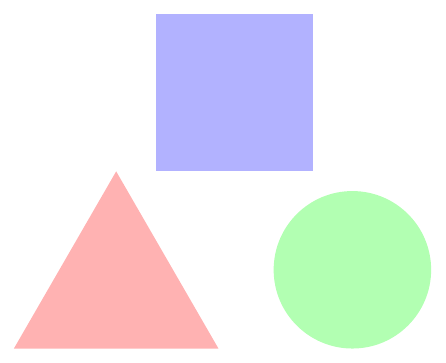

In [4]:
from vif.utils.renderer.tex_renderer import TexRenderer
renderer = TexRenderer()
original_image=renderer.from_string_to_image(original_code)
original_image

In [5]:
instruction = "Rotate the triangle by 180 degrees"

In [6]:
# APIs used
gclient = genai.Client(
    api_key=os.environ.get("GOOGLE_API_KEY"),
    http_options=genTypes.HttpOptions(api_version="v1alpha"),
)
oclient = OpenAI(
    base_url="https://openrouter.ai/api/v1",
    api_key=os.environ.get("OPENROUTER_API_KEY"),
)

# Models used
oracle_module = OracleGuidedCodeModule(
    model="google/gemini-2.5-flash-lite",
    temperature=0.3,
    client=oclient,
    visual_client=gclient,
    visual_model="gemini-2.5-flash"
)

In [7]:
oracle = oracle_module.get_oracle(instruction,original_image)[0]

2025-08-25 14:20:38.882 | INFO     | vif.falcon.oracle.guided_oracle.guided_code_oracle:get_oracle:111 - Creating Oracle for instruction Rotate the triangle by 180 degrees
2025-08-25 14:20:40.794 | INFO     | vif.falcon.oracle.guided_oracle.guided_code_oracle:get_oracle:126 - Oracle created: def test_valid_customization() -> bool:
    return angle("triangle", degree=180)



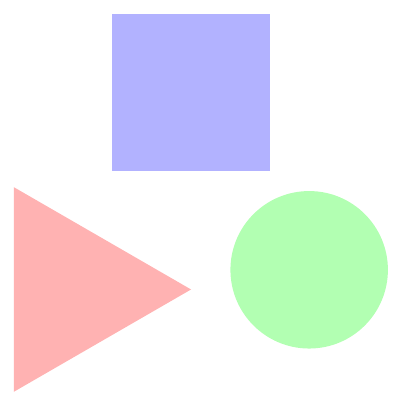

In [8]:
custom_response_1 = LLM_request_1(instruction,original_code)
custom_image_1 = renderer.from_string_to_image(custom_response_1)
custom_image_1

2025-08-25 14:22:00.840 | INFO     | vif.falcon.oracle.guided_oracle.guided_code_oracle:segments_from_features:162 - Features to compute :[triangle]
2025-08-25 14:22:00.843 | INFO     | vif.utils.detection_utils:get_segmentation_masks:90 - Getting masks for features : triangle
2025-08-25 14:22:02.466 | INFO     | vif.utils.detection_utils:get_segmentation_masks:121 - LLM segmentation response: ```json
[
  {"box_2d": [474, 31, 961, 489], "mask": "<start_of_mask><seg_115><seg_91><seg_40><seg_107><seg_115><seg_73><seg_116><seg_115><seg_88><seg_27><seg_21><seg_125><seg_4> (474, 31) to (474, 489) to (961, 489) to (961, 31) to (474, 31)", "label": "triangle"}
]
```
2025-08-25 14:22:02.466 | WARNING  | vif.utils.detection_utils:log_and_append_token_data:184 - [{'box_2d': [474, 31, 961, 489], 'mask': '<start_of_mask><seg_115><seg_91><seg_40><seg_107><seg_115><seg_73><seg_116><seg_115><seg_88><seg_27><seg_21><seg_125><seg_4> (474, 31) to (474, 489) to (961, 489) to (961, 31) to (474, 31)', 'lab

Invalid mask


2025-08-25 14:22:04.368 | INFO     | vif.utils.detection_utils:get_segmentation_masks:121 - LLM segmentation response: ```json
[
  {"box_2d": [474, 31, 961, 489], "mask": "", "label": "triangle"}
]
```
2025-08-25 14:22:04.370 | WARNING  | vif.utils.detection_utils:log_and_append_token_data:184 - Segmentation worked.
2025-08-25 14:22:04.370 | INFO     | vif.utils.caching:checkForCached:42 - new cache
2025-08-25 14:22:04.371 | INFO     | vif.utils.caching:checkForCached:43 - {'90169b8b837640275ad05b775878f858115e9dc5': ([SegmentationMask(y0=172, x0=13, y1=348, x1=218, mask=array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(363, 446), dtype=uint8), label='triangle')], [{'completion_token': 110, 'prompt_token': 343, 'total_tokens': 453, 'error_info': "[{'box_2d': [474, 31, 961, 489], 'mask': '<start_of_mask><seg_115><seg_91><seg_40
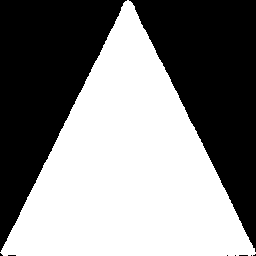
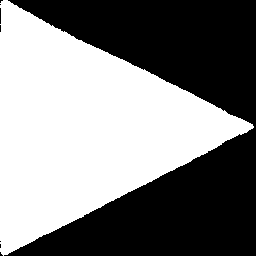

False
['The feature triangle should be rotated by 180 degrees, but is rotated by -90,-85 degrees.']


In [11]:
oracle_response = oracle(custom_image_1)
print(oracle_response.condition)
print(oracle_response.feedbacks)

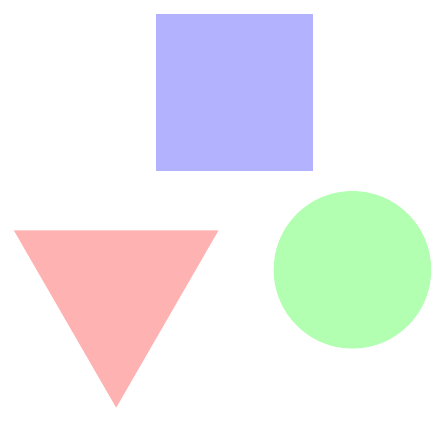

In [12]:
custom_response_2 = LLM_request_2(instruction,original_code)
custom_image_2 = renderer.from_string_to_image(custom_response_2)
custom_image_2

2025-08-25 14:22:17.192 | INFO     | vif.falcon.oracle.guided_oracle.guided_code_oracle:segments_from_features:162 - Features to compute :[triangle]
2025-08-25 14:22:17.193 | WARNING  | vif.utils.caching:checkForCached:45 - Cache hit
2025-08-25 14:22:17.195 | INFO     | vif.falcon.oracle.guided_oracle.guided_code_oracle:segments_from_features:162 - Features to compute :[triangle]
2025-08-25 14:22:17.196 | INFO     | vif.utils.detection_utils:get_segmentation_masks:90 - Getting masks for features : triangle
2025-08-25 14:22:19.114 | INFO     | vif.utils.detection_utils:get_segmentation_masks:121 - LLM segmentation response: ```json
[
  {"box_2d": [543, 31, 963, 489], "mask": "", "label": "triangle"}
]
```
2025-08-25 14:22:19.116 | WARNING  | vif.utils.detection_utils:log_and_append_token_data:184 - Segmentation worked.
2025-08-25 14:22:19.116 | INFO     | vif.utils.caching:checkForCached:42 - new cache
2025-08-25 14:22:19.117 | INFO     | vif.utils.caching:checkForCached:43 - {'90169b8b
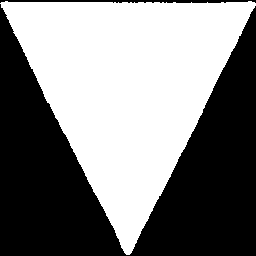

True
[]


In [13]:
oracle_response = oracle(custom_image_2)
print(oracle_response.condition)
print(oracle_response.feedbacks)